In [8]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

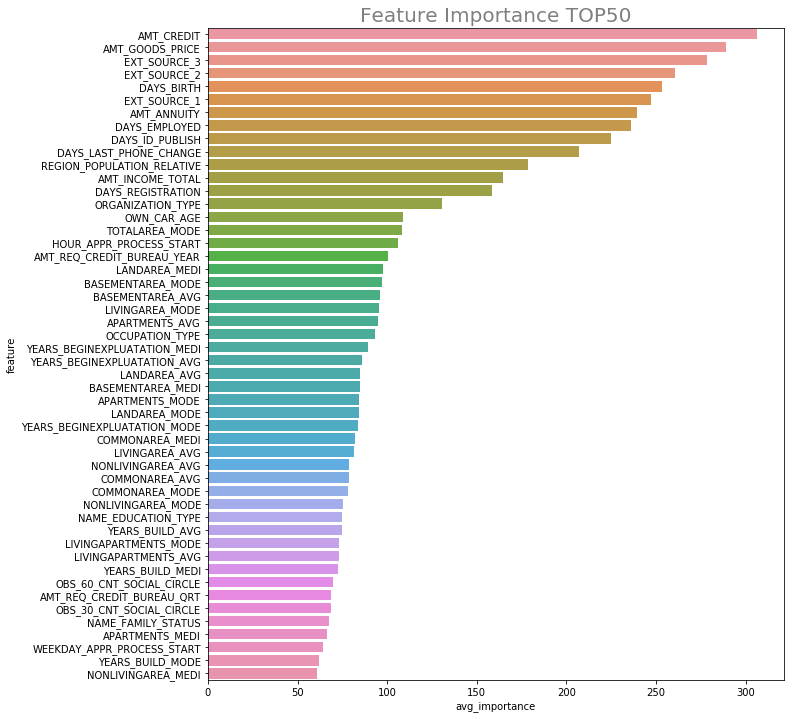

In [17]:
def plt_importance(feim, x='avg_importance', y='feature', N=30, title='Feature Importance'):

    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 12)
    sns.barplot(x=x, y=y, data=feim.head(N), label=x)
    plt.subplots_adjust(left=.4, right=.9)
    plt.title(title+f' TOP{N}', fontsize=20, alpha=0.5)
    plt.show()
    
feim = pd.read_csv('../valid/1027_081_lgb_app_feat109_CV0.7583382134314613_lr0.1.csv')
plt_importance(feim=feim, N=50)